<a href="https://colab.research.google.com/github/programmingLover12/twitter/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
# 0 = non- rumor , 1 = rumor
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM,GRU,Bidirectional
# adding temporal cnn
#from tcn import TCN, tcn_full_summary
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
from  sklearn.model_selection import train_test_split
# adding temporal cnn
!pip install keras-tcn --no-dependencies
from tcn import TCN, tcn_full_summary
models_dir= "/content/drive/MyDrive/CSV_Files/Models"

In [ ]:
def load_data(event,time=3600):
    events = ["charliehebdo", "ferguson", "germanwings-crash", "gurlitt", "ottawashooting", "putinmissing",
                "sydneysiege"]
    data = pd.read_csv(f'CSV_Files/{events[event]}.csv', names=['timeDiff', 'status', 'Freq'], header=0)
    
    data = data[data['timeDiff'] <= time]
    print(data)
    return data


In [ ]:
def build_confusion_matrix(test,predict):

    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(predict)):

        if test[i] == predict[i] == 1:
            TP = TP + 1
        elif test[i] == predict[i] == 0:
            TN = TN + 1
        elif test[i] != predict[i] and  predict[i] == 0:
            FN = FN + 1
        elif test[i] != predict[i] and  predict[i] == 1:
            FP = FP + 1

    return (TP,TN,FP,FN)


In [ ]:
def split_train_test(training):
    scaler =  MinMaxScaler(feature_range=(0,1))
    training = scaler.fit_transform(training)
    train, test = train_test_split(training, test_size=0.3)
    return train, test


In [ ]:
def build_tcnn(x_train,y_train,save, event_name,time,epoch=50):
    #!cd /content/drive/MyDrive/CSV_Files/Models
    seq = len(x_train)
    units = int((seq +2) / 2)
    look_back = 2

    model = Sequential() 
    model.add(TCN(units ,input_shape=(x_train.shape[1], look_back)) )
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse',metrics=["accuracy"])

    tcn_full_summary(model, expand_residual_blocks=False)
    model.fit(x_train, y_train, epochs=epoch)#, validation_split=0.2

    if save == True: 
        model.save(f'{models_dir}/TCNN/TCNN_{event_name}_{time}')
    return model


In [ ]:

def build_LSTM(x_train,y_train,save,event_name,time,epoch=300):
    #,x_test, y_test
    seq = len(x_train)
    units = int((seq +2) / 2)
    look_back = 2
    model = Sequential()
    model.add(LSTM(units, input_shape = (x_train.shape[1], look_back)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile( loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
    model.summary()
    model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=2)
    
    if save == True: 
        model.save(f'{models_dir}/LSTM/LSTM_{event_name}_{time}')
    return model


In [ ]:
def build_RNN(x_train,y_train,save,event_name,time,epoch=300):
    seq = len(x_train)
    units = int((seq +2) / 2)
    look_back =2

    model = Sequential()
    model.add(SimpleRNN(units, input_shape = (x_train.shape[1], look_back)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile( loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
    model.summary()
    model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=2)

    if save==True:        
        model.save(f'{models_dir}/SimpleRNN/SimpleRNN_{event_name}_{time}')
    return model


In [ ]:
def build_GRU(x_train, y_train,save,event_name,time,epoch=300):
    seq = len(x_train)
    units = int((seq +2) / 2)
    look_back =2
    model = keras.Sequential()
    model.add(GRU(units, input_shape = (x_train.shape[1], look_back)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile( loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
    model.summary()
    model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=2)
    
    if save==True:
        model.save(f'{models_dir}/GRU/GRU_{event_name}_{time}')
    return model


In [ ]:
def build_bi_LSTM(x_train, y_train,save,event_name,time,epoch=300):
    seq = len(x_train)
    units = int((seq +2) / 2)
    look_back =2
    
    model = keras.Sequential()
    model.add(Bidirectional(LSTM(units),input_shape = (x_train.shape[1], look_back) ))
    model.add(Dense(1,activation='sigmoid'))
    model.compile( loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])
    model.summary()

    model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=2)
    
    if save==True:
        model.save(f'{models_dir}/BiLSTM/BiLSTM_{event_name}_{time}')
    return model


In [ ]:
def Build_Simple_Dense(x_train, y_train,save,event_name,time,epoch=300):
    seq = len(x_train)
    units = int((seq +2) / 2)
    look_back =2
    
    model = Sequential()
    model.add(Dense(units,input_shape = (x_train.shape[1], look_back)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile( loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
    model.summary()
    model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=2)
    
    if save==True:
        model.save(f'{models_dir}/Simple_Dense/Simple_Dense_{event_name}_{time}')
    return model

In [ ]:
def load_models(event_name,time):
    # loading mdoel
    models = []
    models.append(keras.models.load_model(f'{models_dir}/LSTM/LSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/SimpleRNN/SimpleRNN_{event_name}_{time}') )
    models.append(keras.models.load_model(f'{models_dir}/GRU/GRU_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/BiLSTM/BiLSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/TCNN/TCNN_{event_name}_{time}'))
    return models


In [ ]:
def load_implementaion_A(event_name,time):
    models = []
    models.append(keras.models.load_model(f'{models_dir}/LSTM/LSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/SimpleRNN/SimpleRNN_{event_name}_{time}') )
    models.append(keras.models.load_model(f'{models_dir}/GRU/GRU_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/BiLSTM/BiLSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/TCNN/TCNN_{event_name}_{time}'))
    
    x_test,y_test,_,_ = pre_process(event_name,time)
    return models,x_test,y_test


def load_implementaion_B(event_name,time):
    models = []
    models.append(keras.models.load_model(f'{models_dir}/LSTM/LSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/SimpleRNN/SimpleRNN_{event_name}_{time}') )
    models.append(keras.models.load_model(f'{models_dir}/GRU/GRU_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/BiLSTM/BiLSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/Simple_Dense/Simple_Dense_{event_name}_{time}'))
    
    x_test,y_test,_,_ = pre_process(event_name,time)
    return models,x_test,y_test


In [ ]:
def Ensembler_1(event_name,time,method):
    models = []
    models.append(keras.models.load_model(f'{models_dir}/LSTM/LSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/SimpleRNN/SimpleRNN_{event_name}_{time}') )
    models.append(keras.models.load_model(f'{models_dir}/GRU/GRU_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/BiLSTM/BiLSTM_{event_name}_{time}'))
    models.append(keras.models.load_model(f'{models_dir}/Simple_Dense/Simple_Dense_{event_name}_{time}'))
    
    x_test,expected,_,_ = pre_process(event_name,time)

    array = None
    for i,model in enumerate(models):
        if array is None:
            array = model.predict(x_test)
        elif i == 4:
            img = model.predict(x_test)
            new_img = img.reshape((img.shape[0]*img.shape[1]),img.shape[2])
            array = np.append(array,new_img, axis=1)
            
        else:
            a = model.predict(x_test)
            array = np.append(array,a, axis=1)
    
    result = []
    
    if method == 'vote':
    
      for row in iter(array):
          if (row > 0.50).sum() >=3:
              result.append(1)
          else:
              result.append(0)
    
    elif method == 'avg':
    
      for row in iter(array):
          avg = (row[0]+row[1]+row[2]+row[3]+row[4])/5
          
          if avg > 0.50:
            result.append(1)   
          else:
            result.append(0)
              
    return np.array(result),expected

In [ ]:
def pre_process(EVENT,TIME):
    data = load_data(event = EVENT, time=TIME)
    
    # splitted into 70 - 30
    train, test = train_test_split(data, test_size=0.3)
    
    x_train = train.drop(columns=["status"])
    y_train = train["status"] 

    scaler =  MinMaxScaler(feature_range=(0,1))
    x_train = scaler.fit_transform(x_train)


    x_test = test.drop(columns=["status"])
    y_test = test["status"] 

    scaler =  MinMaxScaler(feature_range=(0,1))
    x_test = scaler.fit_transform(x_test)

    #pdb.set_trace()

    # reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

    return x_test,y_test,x_train,y_train


In [ ]:
def predict(model,event,time):
  x_test,y_test,x_train,y_train = pre_process(event,time)
  m = keras.models.load_model(f'{models_dir}/{model}/{model}_{event}_{time}')
  result = m.predict(x_test)
  print(result.shape)
  print(result)
  predicted = []
  for i,j in zip(result,y_test):
    if i > 0.500:
      #v=1
      predicted.append(1)
    else:
      #v=0
      predicted.append(0)

  return y_test,np.array(predicted)

In [ ]:
def write_results(line):
  import csv
  with open(f'{models_dir}/individual_model_results.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    writer.write(line)
    
  

In [ ]:
def conclude_individual_results():
  import csv
  with open(f'{models_dir}/individual_model_results.csv', 'a',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Model name','Event name','Time ','accuracy','precision','recall','f1_score','TP','TN','FP','FN'])
  
  
  events = [0,1,2,3,4,5,6]
  time = [120,300,600,1800,3600]
  models = ['SimpleRNN','LSTM','BiLSTM','GRU','Simple_Dense']
  events_names = ["charliehebdo", "ferguson", "germanwings-crash", "gurlitt", "ottawashooting", "putinmissing",
                "sydneysiege"]
  for m in models:
    for e in events:
      time_acc=[]
      for t in time:
        avg_acc=0
        avg_prec=0
        avg_recall=0
        avg_f1 =0
        for i in range(0,3):
          expected,predicted = predict(m,e,t)
          print(list(predicted),'  ',list(expected))
          TP,TN,FP,FN = build_confusion_matrix(list(expected),list(predicted))
          print('TP= ',TP,'  TN =',TN,'  FP= ',FP,' FN= ',FN)
          try:
            accuracy = (TN+TP) /(TN+TP+FN+FP)
            precision = TP / (TP+FP)
            recall = TP /(TP+FN)
            f1_score = 2*((precision * recall)/(precision + recall))
          except Exception:
            print('ERROR DIVISION BY ZERO')
            TP,TN,FP,FN =-1,-1,-1,-1  

          avg_acc +=accuracy
          avg_f1+=f1_score
          avg_recall+=recall
          avg_prec+=precision
          import csv
          with open(f'{models_dir}/individual_model_results.csv', 'a',newline='') as file:
            writer = csv.writer(file)
            writer.writerow([m,events_names[e],t,accuracy,precision,recall,f1_score,TP,TN,FP,FN])          
          
          print('accuracy = ',accuracy)
          print('precision = ',precision)
          print('recall = ',recall)
          print('f1 score = ',f1_score)
        import csv
        with open(f'{models_dir}/individual_model_results.csv', 'a') as file:
          writer = csv.writer(file)
          writer.writerow(['average accuracy','average F1 score','average recall','average precision'])
          writer.writerow([(avg_acc/3),(avg_f1/3),(avg_recall/3),(avg_prec/3)])
          time_acc.append((avg_acc/3))
    
      print('sfdsd')
      import csv
      with open(f'{models_dir}/summary_accuracy.csv', 'a',newline='') as file:
        writer = csv.writer(file)
        writer.writerow([m,events_names[e]])
        writer.writerow(time)
        writer.writerow(time_acc)
  

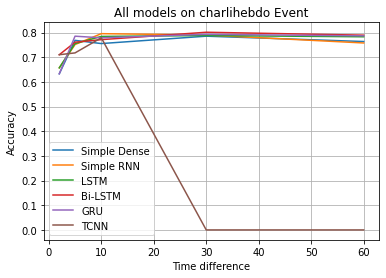

In [ ]:
def plot_charliehebdo():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.632850242,0.768361582,0.755368814,0.785289515,0.763630428], label='Simple Dense')
    plt.plot(time,[0.657004831,	0.751412429	,0.795518207	,0.789984351,0.757753836], label='Simple RNN')
    plt.plot(time,[0.657004831,	0.755178908	,0.784313725	,0.787793427	,0.782892589], label='LSTM')
    plt.plot(time,[0.710144928,	0.760828625,	0.77124183	,0.801251956	,0.789422135], label='Bi-LSTM')
    plt.plot(time,[0.632850242,	0.785310734,	0.778711485	,0.792801252,	0.786647078], label='GRU')
    plt.plot(time,[0.710144928,0.717514124,0.778711485,0,0], label='TCNN')
    
    
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on charlihebdo Event')
    plt.grid(True)
    plt.legend()
plot_charliehebdo()

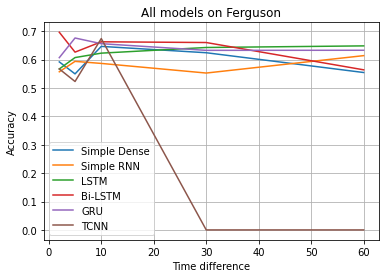

In [ ]:
def plot_ferguson():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.592039801,	0.549808429,	0.646666667	,0.624327957	,0.554626533], label='Simple Dense')
    plt.plot(time,[0.55721393	,0.593869732	,0.586666667	,0.552755376	,0.614083984], label='Simple RNN')
    plt.plot(time,[0.567164179,	0.607279693,	0.622857143,	0.64280914	,0.648457822], label='LSTM')
    plt.plot(time,[0.696517413	,0.626436782	,0.662857143	,0.660282258	,0.564102564], label='Bi-LSTM')
    plt.plot(time,[0.606965174	,0.676245211	,0.656190476	,0.632728495	,0.633036046], label='GRU')
    plt.plot(time,[0.567164179,0.522988506,0.674285714,0,0], label='TCNN')    
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Ferguson')
    plt.grid(True)
    plt.legend()
plot_ferguson()

In [ ]:
def plot_ferguson():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[], label='charlihebdo')
    plt.plot(time,[], label='fergus')
    plt.plot(time,[], label='LSTM')
    plt.plot(time,[], label='Bi-LSTM')
    plt.plot(time,[], label='GRU')
    plt.plot(time,[], label='TCNN')    
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Ferguson')
    plt.grid(True)
    plt.legend()
plot_ferguson()

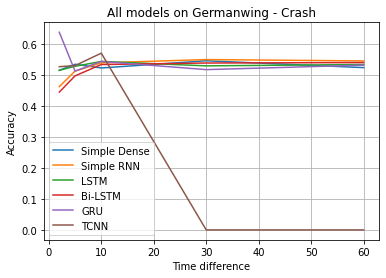

In [ ]:
def plot_germanwings():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.514619883	,0.534216336	,0.522222222	,0.545410628	,0.523361227], label='Simple Dense')
    plt.plot(time,[0.461988304,	0.51214128	,0.538888889	,0.549275362	,0.544979079], label='Simple RNN')
    plt.plot(time,[0.514619883	,0.527593819	,0.543333333	,0.528985507	,0.533472803], label='LSTM')
    plt.plot(time,[0.444444444	,0.496688742	,0.533333333	,0.538164251	,0.539748954], label='Bi-LSTM')
    plt.plot(time,[0.637426901,	0.51214128	,0.543333333	,0.516908213	,0.531380753], label='GRU')
    plt.plot(time,[0.526315789,0.529801325,0.57,0,0], label='TCNN')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Germanwing - Crash')
    plt.grid(True)
    plt.legend()
plot_germanwings()

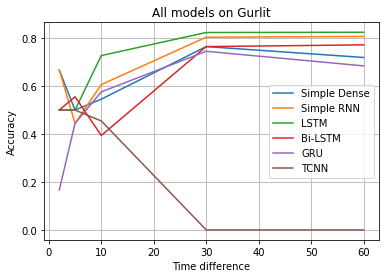

In [ ]:
def plot_gurlit():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.666666667	,0.5	,0.545454545	,0.764705882	,0.719298246], label='Simple Dense')
    plt.plot(time,[0.666666667,	0.444444444,	0.606060606,	0.803921569	,0.807017544], label='Simple RNN')
    plt.plot(time,[0.5	,0.5,	0.727272727,	0.823529412,	0.824561404], label='LSTM')
    plt.plot(time,[0.5	,0.555555556	,0.393939394	,0.764705882,	0.771929825], label='Bi-LSTM')
    plt.plot(time,[0.166666667	,0.444444444,	0.575757576	,0.745098039,	0.684210526], label='GRU')
    plt.plot(time,[0.5,0.5,0.454545455,0,0], label='TCNN')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Gurlit')
    plt.grid(True)
    plt.legend()
plot_gurlit()

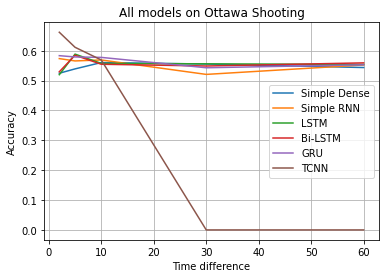

In [ ]:
def plot_ottawa_shooting():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.524509804,	0.539047619,	0.560344828,	0.555312158,	0.543617998], label='Simple Dense')
    plt.plot(time,[0.573529412,	0.565714286,	0.568965517,	0.520627966,	0.552341598], label='Simple RNN')
    plt.plot(time,[0.519607843,	0.588571429,	0.557471264,	0.556042351,	0.553948577], label='LSTM')
    plt.plot(time,[0.529411765,	0.584761905,	0.554597701,	0.548740416,	0.55922865], label='Bi-LSTM')
    plt.plot(time,[0.583333333,	0.579047619,	0.577586207,	0.542898868,	0.552800735], label='GRU')
    plt.plot(time,[0.661764706,0.611428571,0.568965517,0,0], label='TCNN')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Ottawa Shooting')
    plt.grid(True)
    plt.legend()
plot_ottawa_shooting()

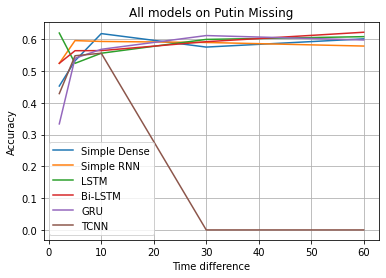

In [ ]:
def plot_putin_missing():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.452380952	,0.531746032	,0.617283951,	0.574879227,	0.600694444], label='Simple Dense')
    plt.plot(time,[0.523809524	,0.595238095	,0.592592593,	0.589371981,	0.578125], label='Simple RNN')
    plt.plot(time,[0.619047619	,0.523809524	,0.555555556,	0.599033816,	0.607638889], label='LSTM')
    plt.plot(time,[0.523809524	,0.563492063	,0.563786008,	0.59178744	,0.621527778], label='Bi-LSTM')
    plt.plot(time,[0.333333333	,0.53968254	  ,0.567901235,	0.611111111,	0.597222222], label='GRU')
    plt.plot(time,[0.428571429,0.547619048,0.555555556,0,0], label='TCNN')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Putin Missing')
    plt.grid(True)
    plt.legend()
plot_putin_missing()

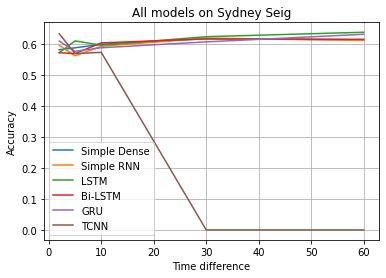

In [ ]:
def plot_sydney_seig():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.582159624	,0.588454376,	0.599814299	,0.617988395	,0.61417604], label='Simple Dense')
    plt.plot(time,[0.596244131	,0.562383613,	0.593314763	,0.619922631	,0.612390645], label='Simple RNN')
    plt.plot(time,[0.572769953	,0.610800745,	0.597028784	,0.624435848	,0.638814497], label='LSTM')
    plt.plot(time,[0.572769953	,0.569832402,	0.604456825	,0.617343649	,0.615961435], label='Bi-LSTM')
    plt.plot(time,[0.610328638	,0.577281192,	0.588672238	,0.607672469	,0.632208534], label='GRU')
    plt.plot(time,[0.633802817,0.569832402,0.573816156,0,0], label='TCNN')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All models on Sydney Seig')
    plt.grid(True)
    plt.legend()
plot_sydney_seig()

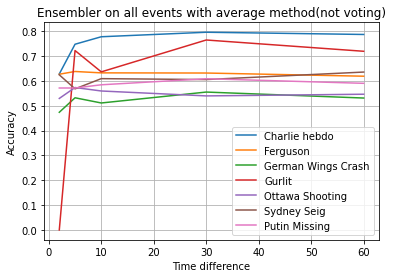

In [ ]:
def plot_ensembler_1_avg():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.628019324,0.747645951,0.777777778,0.795931142,0.786973555], label='Charlie hebdo')
    plt.plot(time,[0.626865672,0.637931034,0.632380952,0.63172043,0.618914902],label='Ferguson')
    plt.plot(time,[0.473684211,0.53200883,0.511111111,0.555072464,0.531032078],label='German Wings Crash')
    plt.plot(time,[0,0.722222222,0.636363636,0.764705882,0.719298246], label='Gurlit')
    plt.plot(time,[0.529411765,0.573333333,0.559386973,0.539612997,0.546372819], label='Ottawa Shooting')
    plt.plot(time,[0.624413146,0.567970205,0.60909935,0.605415861,0.635600786], label='Sydney Seig')
    plt.plot(time,[0.571428571,0.571428571,0.58436214,0.608695652,0.590277778], label='Putin Missing')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('Ensembler on all events with average method(not voting)')
    plt.grid(True)
    plt.legend()  
plot_ensembler_1_avg()

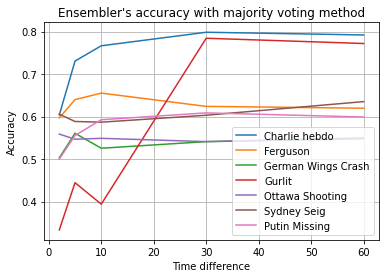

In [ ]:
def plot_ensembler_1_voting():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.603864734,0.730696798,0.766573296,0.798435055,0.792033954], label='Charlie hebdo')
    plt.plot(time,[0.597014925,0.639846743,0.655238095,0.623991935,0.61965812], label='Ferguson')
    plt.plot(time,[0.502923977,0.560706402,0.525555556,0.541062802,0.54776848], label='German Wings Crash')
    plt.plot(time,[0.333333333,0.444444444,0.393939394,0.784313725,0.771929825], label='Gurlit')
    plt.plot(time,[0.558823529,0.546666667,0.548850575,0.541073384,0.550045914], label='Ottawa Shooting')
    plt.plot(time,[0.605633803,0.588454376,0.586815227,0.603159252,0.635243706], label='Sydney Seig')
    plt.plot(time,[0.5,0.555555556,0.592592593,0.608695652,0.598958333], label='Putin Missing')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('Ensembler\'s accuracy with majority voting method')
    plt.grid(True)
    plt.legend()
    plt.show()  
plot_ensembler_1_voting()

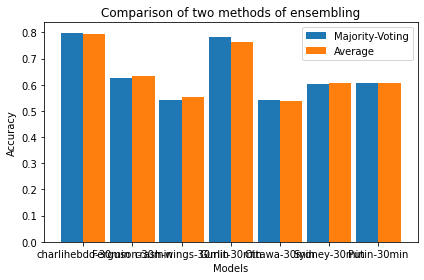

In [ ]:
def ensembler_methods_comparison():
  import matplotlib.pyplot as plt

  voting = [0.603864734,0.730696798,0.766573296,0.798435055,0.792033954,
              0.597014925,0.639846743,0.655238095,0.623991935,0.61965812,
              0.502923977,0.560706402,0.525555556,0.541062802,0.54776848,
              0.333333333,0.444444444,0.393939394,0.784313725,0.771929825,
              0.558823529,0.546666667,0.548850575,0.541073384,0.550045914,
              0.605633803,0.588454376,0.586815227,0.603159252,0.635243706,
              0.5,0.555555556,0.592592593,0.608695652,0.598958333]

  voting=[0.798435055,0.623991935,0.541062802,0.784313725,0.541073384,0.603159252,0.608695652]

  avg = [   0.628019324,0.747645951,0.777777778,0.795931142,0.786973555,
            0.626865672,0.637931034,0.632380952,0.63172043,0.618914902,
            0.473684211,0.53200883,0.511111111, 0.555072464,0.531032078,
            0,0.722222222,0.636363636,0.764705882,0.719298246,
            0.529411765,0.573333333,0.559386973,0.539612997,0.546372819,
            0.624413146,0.567970205,0.60909935,0.605415861,0.635600786,
            0.571428571,0.571428571,0.58436214,0.608695652,0.590277778]

  avg = [0.795931142,0.63172043,0.555072464,0.764705882,0.539612997,0.605415861,0.608695652]

  labels = ['charlihebdo-2min','charlihebdo-5min','charlihebdo-10min','charlihebdo-30min','charlihebdo-60min',
            'Ferguson-2min','Ferguson-5min','Ferguson-10min','Ferguson-30min','Ferguson-60min',
            'crash-wings-2min','crash-wings-5min','crash-wings-10min','crash-wings-30min','crash-wings-60min',
            'Gurlit-2min','Gurlit-5min','Gurlit-10min','Gurlit-30min','Gurlit-60min',
            'Ottawa-2min','Ottawa-5min','Ottawa-10min','Ottawa-30min','Ottawa-60min',
            'Sydney-2min','Sydney-5min','Sydney-10min','Sydney-30min','Sydney-60min',
            'Putin-2min','Putin-5min','Putin-10min','Putin-30min','Putin-60min']

  labels = ['charlihebdo-30min','Ferguson-30min','crash-wings-30min','Gurlit-30min','Ottawa-30min','Sydney-30min','Putin-30min']
  index = np.arange(len(labels))
  bar_width = 0.45
  fig, ax = plt.subplots()#figsize=(25,5)
  #fig(figsize=(0.25, 0.15)

  #x = np.arange(len(labels))

  majority_voting = ax.bar(index - bar_width/2,voting, bar_width,label="Majority-Voting")

  avg_method = ax.bar(index + bar_width/2, avg ,bar_width, label="Average")

  ax.set_xlabel('Models')
  ax.set_ylabel('Accuracy')
  ax.set_title('Comparison of two methods of ensembling')
  ax.set_xticks(index)
  ax.set_xticklabels(labels)
  ax.legend()#fontsize = 40
  #plt.show()
  #ax.bar_label(majority_voting)
  #ax.bar_label(avg_method)#, padding=3
  fig.tight_layout()
  plt.show()

ensembler_methods_comparison()

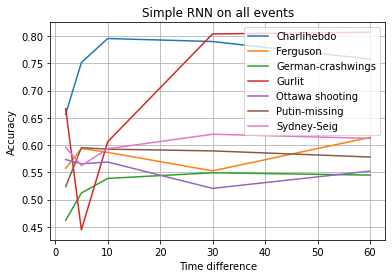

In [6]:
def plot_SimpleRNN():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.657004831,0.751412429,0.795518207,0.789984351,0.757753836], label='Charlihebdo')
    plt.plot(time,[0.55721393,0.59386973,0.58666666,0.55275537,0.614083984], label='Ferguson')
    plt.plot(time,[0.461988304,0.51214128,0.538888889,0.549275362,0.544979079],label='German-crashwings')
    plt.plot(time,[0.666666667,0.444444444,0.606060606,0.803921569,0.807017544], label='Gurlit')
    plt.plot(time,[0.573529412,0.565714286,0.568965517,0.520627966,0.552341598], label='Ottawa shooting')
    plt.plot(time,[0.523809524,0.595238095,0.592592593,0.589371981,0.578125], label='Putin-missing')
    plt.plot(time,[0.596244131,0.562383613,0.593314763,0.619922631,0.612390645], label='Sydney-Seig')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('Simple RNN on all events')
    plt.grid(True)
    plt.legend()
plot_SimpleRNN()

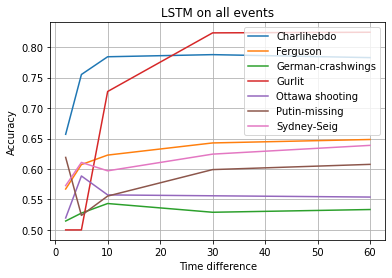

In [8]:
def plot_LSTM():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.657004831,0.755178908,0.784313725,0.787793427,0.782892589], label='Charlihebdo')
    plt.plot(time,[0.567164179,0.607279693,0.622857143,0.64280914,0.648457822], label='Ferguson')
    plt.plot(time,[0.514619883,0.527593819,0.543333333,0.528985507,0.533472803],label='German-crashwings')
    plt.plot(time,[0.5,0.5,0.727272727,0.823529412,0.824561404], label='Gurlit')
    plt.plot(time,[0.519607843,0.588571429,0.557471264,0.556042351,0.553948577], label='Ottawa shooting')
    plt.plot(time,[0.619047619,0.523809524,0.555555556,0.599033816,0.607638889], label='Putin-missing')
    plt.plot(time,[0.572769953,0.610800745,0.597028784,0.624435848,0.638814497], label='Sydney-Seig')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('LSTM on all events')
    plt.grid(True)
    plt.legend()
plot_LSTM()

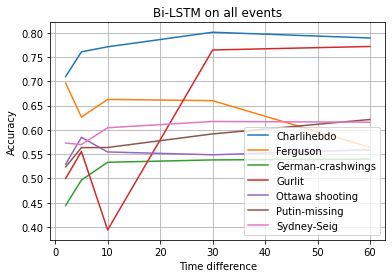

In [11]:
def plot_Bi_LSTM():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.710144928,0.760828625,0.77124183,0.801251956,0.789422135], label='Charlihebdo')
    plt.plot(time,[0.696517413,0.626436782,0.662857143,0.660282258,0.564102564], label='Ferguson')
    plt.plot(time,[0.444444444,0.496688742,0.533333333,0.538164251,0.539748954],label='German-crashwings')
    plt.plot(time,[0.5,0.555555556,0.393939394,0.764705882,0.771929825], label='Gurlit')
    plt.plot(time,[0.529411765,0.584761905,0.554597701,0.548740416,0.55922865], label='Ottawa shooting')
    plt.plot(time,[0.523809524,0.563492063,0.563786008,0.59178744,0.621527778], label='Putin-missing')
    plt.plot(time,[0.572769953,0.569832402,0.604456825,0.617343649,0.615961435], label='Sydney-Seig')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('Bi-LSTM on all events')
    plt.grid(True)
    plt.legend()
plot_Bi_LSTM()

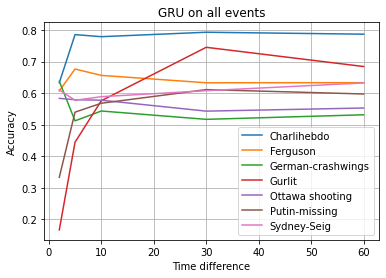

In [13]:
def plot_GRU():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.632850242,0.785310734,0.778711485,0.792801252,0.786647078], label='Charlihebdo')
    plt.plot(time,[0.606965174,0.676245211,0.656190476,0.632728495,0.633036046], label='Ferguson')
    plt.plot(time,[0.637426901,0.51214128,0.543333333,0.516908213,0.531380753],label='German-crashwings')
    plt.plot(time,[0.166666667,0.444444444,0.575757576,0.745098039,0.684210526], label='Gurlit')
    plt.plot(time,[0.583333333,0.579047619,0.577586207,0.542898868,0.552800735], label='Ottawa shooting')
    plt.plot(time,[0.333333333,0.53968254,0.567901235,0.611111111,0.597222222], label='Putin-missing')
    plt.plot(time,[0.610328638,0.577281192,0.588672238,0.607672469,0.632208534], label='Sydney-Seig')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('GRU on all events')
    plt.grid(True)
    plt.legend()
plot_GRU()

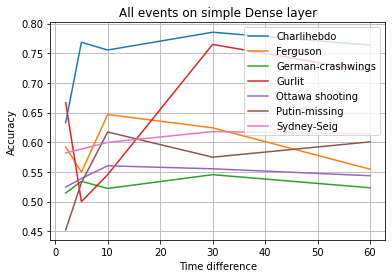

In [16]:
def Simple_Dense():
    time = [2,5,10,30,60]
    import matplotlib.pyplot as plt
    plt.plot(time,[0.632850242,0.768361582,0.755368814,0.785289515,0.763630428], label='Charlihebdo')
    plt.plot(time,[0.592039801,0.549808429,0.646666667,0.624327957,0.554626533], label='Ferguson')
    plt.plot(time,[0.514619883,0.534216336,0.522222222,0.545410628,0.523361227],label='German-crashwings')
    plt.plot(time,[0.666666667,0.5,0.545454545,0.764705882,0.719298246], label='Gurlit')
    plt.plot(time,[0.524509804,0.539047619,0.560344828,0.555312158,0.543617998], label='Ottawa shooting')
    plt.plot(time,[0.452380952,0.531746032,0.617283951,0.574879227,0.600694444], label='Putin-missing')
    plt.plot(time,[0.582159624,0.588454376,0.599814299,0.617988395,0.61417604], label='Sydney-Seig')
    x_axis = 'time stamp'
    y_axis = 'accuracy'
    plt.xlabel('Time difference')
    plt.ylabel('Accuracy')
    plt.title('All events on simple Dense layer')
    plt.grid(True)
    plt.legend()
Simple_Dense()

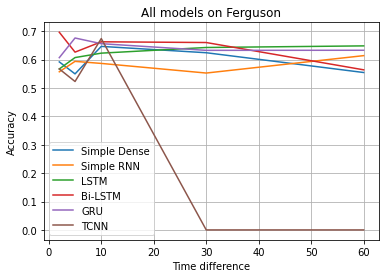

In [ ]:
if __name__ == "__main__":

  #tm = [120,300,600]
  #for e in range(7):
  #  for t in tm:
  #    predicted,expected = predict('TCNN',e,t)
  #    #print(pr.shape)
  #    events_names = ["charliehebdo", "ferguson", "germanwings-crash", "gurlitt", "ottawashooting", "putinmissing",
  #                  "sydneysiege"]
#
  #    #predicted,expected = Ensembler_1(0,1800,'avg')
  #    TP,TN,FP,FN = build_confusion_matrix(list(expected),list(predicted))
  #    print('TP= ',TP,'  TN =',TN,'  FP= ',FP,' FN= ',FN)
  #    try:
  #      accuracy = (TN+TP) /(TN+TP+FN+FP)
  #      precision = TP / (TP+FP)
  #      recall = TP /(TP+FN)
  #      f1_score = 2*((precision * recall)/(precision + recall))
  #      print(f'accuracy = {accuracy}, f1 = {f1_score}')
  #    except Exception:
  #      print('ERROR DIVISION BY ZERO')
  #      TP,TN,FP,FN =-1,-1,-1,-1
  #    import csv
  #    with open(f'{models_dir}/TCNN_results.csv', 'a',newline='') as file:
  #      writer = csv.writer(file)
  #      writer.writerow([events_names[e],t,accuracy,precision,recall,f1_score,TP,TN,FP,FN])
 
  #print(result)
  #print(list(predicted),'  ',list(expected))

  #SimpleRNN  LSTM  GRU BiLSTM TCNN
  #train on 45 min
  #draw graph which show which model outperformed all
  
  #conclude_individual_results()
  #plot_ensembler_1_voting()
  #plot_ensembler_1_avg()
  
  #plot_charliehebdo()
  plot_ferguson()
  #plot_germanwings()
  #plot_gurlit()
  #plot_putin_missing()
  #plot_sydney_seig()
  #plot_ottawa_shooting()
  #plot_ensembler_1()

In [ ]:
#x_test,y_test,x_train,y_train = pre_process(4,600)
#model5_A = build_tcnn(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,4,600 ,120)
SAVE_MODEL_AFTER_TRAINING=True
t=2700
epoch =120
event = [1,2,3,4,5,6]

#x_test,y_test,x_train,y_train = pre_process(0,t)
#build_GRU(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,0,t ,epoch)
#build_bi_LSTM(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,0,t ,epoch)
#build_RNN(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,0,t ,epoch)
#Build_Simple_Dense(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,0,t ,epoch)    
    


for e in event:
    x_test,y_test,x_train,y_train = pre_process(e,t)  
    build_LSTM(x_train,y_train,SAVE_MODEL_AFTER_TRAINING    ,e,t  ,epoch)
    build_GRU(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,e,t ,epoch)
    build_bi_LSTM(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,e,t ,epoch)
    build_RNN(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,e,t ,epoch)
    Build_Simple_Dense(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,e,t ,epoch)    
    #model5_A = build_tcnn(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,e,t ,epoch)    


      timeDiff  status  Freq
0            0       0   572
1            1       0     1
2            6       0     1
3            7       0     1
4           11       0     1
...        ...     ...   ...
5363      2695       1     0
5364      2696       1     1
5365      2697       1     1
5366      2698       1     1
5367      2700       1     1

[4758 rows x 3 columns]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1666)              11122216  
_________________________________________________________________
dense (Dense)                (None, 1)                 1667      
Total params: 11,123,883
Trainable params: 11,123,883
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
105/105 - 13s - loss: 0.6931 - accuracy: 0.5132
Epoch 2/120
105/105 - 10s - loss: 0.6911 - accuracy: 0.5336
Epoch 3/120
1

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_1_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_1_2700/assets


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1666)              8346660   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1667      
Total params: 8,348,327
Trainable params: 8,348,327
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
105/105 - 11s - loss: 0.6929 - accuracy: 0.5144
Epoch 2/120
105/105 - 8s - loss: 0.6885 - accuracy: 0.5625
Epoch 3/120
105/105 - 9s - loss: 0.6833 - accuracy: 0.5664
Epoch 4/120
105/105 - 9s - loss: 0.6726 - accuracy: 0.6144
Epoch 5/120
105/105 - 9s - loss: 0.6595 - accuracy: 0.6258
Epoch 6/120
105/105 - 9s - loss: 0.6528 - accuracy: 0.6279
Epoch 7/120
105/105 - 9s - loss: 0.6460 - accuracy: 0.6414
Epoch 8/120
105/105 - 9s - loss: 0.6428 - accuracy: 0.6354
Epoch 9/120
105/105 - 8s - loss: 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_1_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_1_2700/assets


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 3332)              22244432  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3333      
Total params: 22,247,765
Trainable params: 22,247,765
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
105/105 - 24s - loss: 0.2497 - accuracy: 0.5168
Epoch 2/120
105/105 - 21s - loss: 0.2478 - accuracy: 0.5607
Epoch 3/120
105/105 - 21s - loss: 0.2418 - accuracy: 0.5673
Epoch 4/120
105/105 - 21s - loss: 0.2298 - accuracy: 0.6321
Epoch 5/120
105/105 - 21s - loss: 0.2190 - accuracy: 0.6429
Epoch 6/120
105/105 - 21s - loss: 0.2130 - accuracy: 0.6565
Epoch 7/120
105/105 - 21s - loss: 0.2118 - accuracy: 0.6514
Epoch 8/120
105/105 - 21s - loss: 0.2111 - accuracy: 0.6559
Epoch 9/120
105/105 - 21

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_1_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_1_2700/assets


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1666)              2780554   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1667      
Total params: 2,782,221
Trainable params: 2,782,221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
105/105 - 5s - loss: 0.6954 - accuracy: 0.5177
Epoch 2/120
105/105 - 5s - loss: 0.6882 - accuracy: 0.5435
Epoch 3/120
105/105 - 5s - loss: 0.6806 - accuracy: 0.5838
Epoch 4/120
105/105 - 5s - loss: 0.6673 - accuracy: 0.6456
Epoch 5/120
105/105 - 4s - loss: 0.6575 - accuracy: 0.6357
Epoch 6/120
105/105 - 3s - loss: 0.6563 - accuracy: 0.6228
Epoch 7/120
105/105 - 4s - loss: 0.6391 - accuracy: 0.6532
Epoch 8/120
105/105 - 3s - loss: 0.6392 - accuracy: 0.6480
Epoch 9/120
105/105 - 3s - loss: 0

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/SimpleRNN/SimpleRNN_1_2700/assets


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1, 1666)           4998      
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)              1667      
Total params: 6,665
Trainable params: 6,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
105/105 - 1s - loss: 0.6923 - accuracy: 0.5279
Epoch 2/120
105/105 - 0s - loss: 0.6858 - accuracy: 0.5727
Epoch 3/120
105/105 - 0s - loss: 0.6763 - accuracy: 0.6132
Epoch 4/120
105/105 - 0s - loss: 0.6616 - accuracy: 0.6177
Epoch 5/120
105/105 - 0s - loss: 0.6417 - accuracy: 0.6315
Epoch 6/120
105/105 - 0s - loss: 0.6240 - accuracy: 0.6465
Epoch 7/120
105/105 - 0s - loss: 0.6201 - accuracy: 0.6474
Epoch 8/120
105/105 - 0s - loss: 0.6183 - accuracy: 0.6583
Epoch 9/120
105/105 - 0s - loss: 0.6165 - 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/Simple_Dense/Simple_Dense_1_2700/assets


      timeDiff  status  Freq
0            3       0     1
1            9       0     1
2           15       0     1
3           19       0     1
4           20       0     0
...        ...     ...   ...
2995      2691       1     1
2996      2692       1     0
2997      2693       1     1
2998      2694       1     0
2999      2700       1     1

[2816 rows x 3 columns]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 986)               3900616   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 987       
Total params: 3,901,603
Trainable params: 3,901,603
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
62/62 - 6s - loss: 0.6937 - accuracy: 0.4977
Epoch 2/120
62/62 - 3s - loss: 0.6933 - accuracy: 0.5119
Epoch 3/120
62/62 -

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_2_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_2_2700/assets


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 986)               2928420   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 987       
Total params: 2,929,407
Trainable params: 2,929,407
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
62/62 - 4s - loss: 0.6941 - accuracy: 0.4871
Epoch 2/120
62/62 - 2s - loss: 0.6934 - accuracy: 0.5028
Epoch 3/120
62/62 - 2s - loss: 0.6935 - accuracy: 0.5099
Epoch 4/120
62/62 - 2s - loss: 0.6933 - accuracy: 0.5099
Epoch 5/120
62/62 - 2s - loss: 0.6934 - accuracy: 0.5119
Epoch 6/120
62/62 - 2s - loss: 0.6930 - accuracy: 0.5119
Epoch 7/120
62/62 - 2s - loss: 0.6933 - accuracy: 0.5053
Epoch 8/120
62/62 - 2s - loss: 0.6927 - accuracy: 0.5211
Epoch 9/120
62/62 - 2s - loss: 0.6933 - accuracy: 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_2_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_2_2700/assets


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1972)              7801232   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1973      
Total params: 7,803,205
Trainable params: 7,803,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
62/62 - 9s - loss: 0.2502 - accuracy: 0.4967
Epoch 2/120
62/62 - 6s - loss: 0.2500 - accuracy: 0.5109
Epoch 3/120
62/62 - 6s - loss: 0.2502 - accuracy: 0.5018
Epoch 4/120
62/62 - 6s - loss: 0.2502 - accuracy: 0.5114
Epoch 5/120
62/62 - 6s - loss: 0.2498 - accuracy: 0.5124
Epoch 6/120
62/62 - 6s - loss: 0.2498 - accuracy: 0.5114
Epoch 7/120
62/62 - 6s - loss: 0.2499 - accuracy: 0.5114
Epoch 8/120
62/62 - 6s - loss: 0.2498 - accuracy: 0.5140
Epoch 9/120
62/62 - 6s - loss: 0.2498 - accuracy: 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_2_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_2_2700/assets


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 986)               975154    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 987       
Total params: 976,141
Trainable params: 976,141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
62/62 - 2s - loss: 0.6958 - accuracy: 0.4947
Epoch 2/120
62/62 - 1s - loss: 0.6933 - accuracy: 0.5180
Epoch 3/120
62/62 - 1s - loss: 0.6943 - accuracy: 0.5195
Epoch 4/120
62/62 - 1s - loss: 0.6946 - accuracy: 0.5109
Epoch 5/120
62/62 - 1s - loss: 0.6938 - accuracy: 0.5094
Epoch 6/120
62/62 - 1s - loss: 0.6933 - accuracy: 0.5048
Epoch 7/120
62/62 - 1s - loss: 0.6934 - accuracy: 0.5084
Epoch 8/120
62/62 - 1s - loss: 0.6936 - accuracy: 0.5211
Epoch 9/120
62/62 - 1s - loss: 0.6935 - accuracy: 0.50

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/SimpleRNN/SimpleRNN_2_2700/assets


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1, 986)            2958      
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1)              987       
Total params: 3,945
Trainable params: 3,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
62/62 - 1s - loss: 0.6945 - accuracy: 0.4947
Epoch 2/120
62/62 - 0s - loss: 0.6947 - accuracy: 0.5089
Epoch 3/120
62/62 - 0s - loss: 0.6946 - accuracy: 0.4972
Epoch 4/120
62/62 - 0s - loss: 0.6938 - accuracy: 0.5099
Epoch 5/120
62/62 - 0s - loss: 0.6941 - accuracy: 0.5023
Epoch 6/120
62/62 - 0s - loss: 0.6936 - accuracy: 0.5134
Epoch 7/120
62/62 - 0s - loss: 0.6934 - accuracy: 0.5084
Epoch 8/120
62/62 - 0s - loss: 0.6932 - accuracy: 0.5170
Epoch 9/120
62/62 - 0s - loss: 0.6937 - accuracy: 0.5119
E

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/Simple_Dense/Simple_Dense_2_2700/assets


    timeDiff  status  Freq
0         40       0     1
1        119       0     0
2        187       0     1
3        195       0     0
4        200       0     1
5        230       0     2
6        261       0     0
7        281       0     1
8        296       0     0
9        304       0     0
10       323       0     0
11       336       0     0
12       347       0     0
13       389       0     0
14       469       0     1
15       526       0     0
16       584       0     0
17       634       0     0
18       681       0     0
19       695       0     0
20       797       0     0
21       989       0     0
22      1194       0     0
23      1450       0     0
24      1485       0     0
25      1614       0     0
26      1788       0     0
27      2036       0     0
28      2255       0     0
29      2535       0     0
31        40       1     0
32       119       1     1
33       187       1     0
34       195       1     1
35       200       1     0
36       230       1     0
3

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_3_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_3_2700/assets


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 22)                1716      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 23        
Total params: 1,739
Trainable params: 1,739
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
2/2 - 2s - loss: 0.7225 - accuracy: 0.5476
Epoch 2/120
2/2 - 0s - loss: 0.7210 - accuracy: 0.5476
Epoch 3/120
2/2 - 0s - loss: 0.7195 - accuracy: 0.5476
Epoch 4/120
2/2 - 0s - loss: 0.7182 - accuracy: 0.5476
Epoch 5/120
2/2 - 0s - loss: 0.7170 - accuracy: 0.5476
Epoch 6/120
2/2 - 0s - loss: 0.7158 - accuracy: 0.5476
Epoch 7/120
2/2 - 0s - loss: 0.7146 - accuracy: 0.5476
Epoch 8/120
2/2 - 0s - loss: 0.7134 - accuracy: 0.5476
Epoch 9/120
2/2 - 0s - loss: 0.7124 - accuracy: 0.5476
Epoch 10/120
2/2 -

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_3_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_3_2700/assets


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 44)                4400      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 45        
Total params: 4,445
Trainable params: 4,445
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
2/2 - 4s - loss: 0.2488 - accuracy: 0.5476
Epoch 2/120
2/2 - 0s - loss: 0.2483 - accuracy: 0.5238
Epoch 3/120
2/2 - 0s - loss: 0.2477 - accuracy: 0.5238
Epoch 4/120
2/2 - 0s - loss: 0.2472 - accuracy: 0.5476
Epoch 5/120
2/2 - 0s - loss: 0.2467 - accuracy: 0.5238
Epoch 6/120
2/2 - 0s - loss: 0.2463 - accuracy: 0.5476
Epoch 7/120
2/2 - 0s - loss: 0.2458 - accuracy: 0.5952
Epoch 8/120
2/2 - 0s - loss: 0.2454 - accuracy: 0.5952
Epoch 9/120
2/2 - 0s - loss: 0.2449 - accuracy: 0.6190
Epoch 10/120
2/2 -

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_3_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_3_2700/assets


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 22)                550       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 23        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
2/2 - 1s - loss: 0.6753 - accuracy: 0.4524
Epoch 2/120
2/2 - 0s - loss: 0.6725 - accuracy: 0.7619
Epoch 3/120
2/2 - 0s - loss: 0.6700 - accuracy: 0.7619
Epoch 4/120
2/2 - 0s - loss: 0.6676 - accuracy: 0.7619
Epoch 5/120
2/2 - 0s - loss: 0.6652 - accuracy: 0.7619
Epoch 6/120
2/2 - 0s - loss: 0.6626 - accuracy: 0.7619
Epoch 7/120
2/2 - 0s - loss: 0.6605 - accuracy: 0.7619
Epoch 8/120
2/2 - 0s - loss: 0.6582 - accuracy: 0.7619
Epoch 9/120
2/2 - 0s - loss: 0.6561 - accuracy: 0.7619
Epoch 10/120
2/2 - 0s 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/SimpleRNN/SimpleRNN_3_2700/assets


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1, 22)             66        
_________________________________________________________________
dense_17 (Dense)             (None, 1, 1)              23        
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
2/2 - 1s - loss: 0.6673 - accuracy: 0.6905
Epoch 2/120
2/2 - 0s - loss: 0.6649 - accuracy: 0.6905
Epoch 3/120
2/2 - 0s - loss: 0.6626 - accuracy: 0.6905
Epoch 4/120
2/2 - 0s - loss: 0.6607 - accuracy: 0.7143
Epoch 5/120
2/2 - 0s - loss: 0.6587 - accuracy: 0.7143
Epoch 6/120
2/2 - 0s - loss: 0.6568 - accuracy: 0.7381
Epoch 7/120
2/2 - 0s - loss: 0.6550 - accuracy: 0.7381
Epoch 8/120
2/2 - 0s - loss: 0.6532 - accuracy: 0.7381
Epoch 9/120
2/2 - 0s - loss: 0.6515 - accuracy: 0.7381
Epoch 10/120
2/2 - 0s - 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/Simple_Dense/Simple_Dense_3_2700/assets


      timeDiff  status  Freq
0            5       0     1
1            7       0     1
2            9       0     1
3           11       0     3
4           12       0     0
...        ...     ...   ...
4444      2693       1     1
4445      2694       1     1
4446      2696       1     1
4447      2698       1     1
4448      2700       1     1

[4058 rows x 3 columns]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1421)              8094016   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 1422      
Total params: 8,095,438
Trainable params: 8,095,438
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
89/89 - 9s - loss: 0.6923 - accuracy: 0.5134
Epoch 2/120
89/89 - 7s - loss: 0.6907 - accuracy: 0.5215
Epoch 3/120
89/89 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_4_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_4_2700/assets


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 1421)              6074775   
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1422      
Total params: 6,076,197
Trainable params: 6,076,197
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
89/89 - 8s - loss: 0.6936 - accuracy: 0.5056
Epoch 2/120
89/89 - 6s - loss: 0.6902 - accuracy: 0.5317
Epoch 3/120
89/89 - 6s - loss: 0.6885 - accuracy: 0.5412
Epoch 4/120
89/89 - 6s - loss: 0.6874 - accuracy: 0.5419
Epoch 5/120
89/89 - 6s - loss: 0.6882 - accuracy: 0.5426
Epoch 6/120
89/89 - 6s - loss: 0.6884 - accuracy: 0.5331
Epoch 7/120
89/89 - 6s - loss: 0.6869 - accuracy: 0.5342
Epoch 8/120
89/89 - 6s - loss: 0.6879 - accuracy: 0.5356
Epoch 9/120
89/89 - 6s - loss: 0.6876 - accuracy:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_4_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_4_2700/assets


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 2842)              16188032  
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 2843      
Total params: 16,190,875
Trainable params: 16,190,875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
89/89 - 21s - loss: 0.2495 - accuracy: 0.5095
Epoch 2/120
89/89 - 14s - loss: 0.2485 - accuracy: 0.5313
Epoch 3/120
89/89 - 14s - loss: 0.2474 - accuracy: 0.5433
Epoch 4/120
89/89 - 14s - loss: 0.2476 - accuracy: 0.5500
Epoch 5/120
89/89 - 15s - loss: 0.2471 - accuracy: 0.5412
Epoch 6/120
89/89 - 14s - loss: 0.2477 - accuracy: 0.5271
Epoch 7/120
89/89 - 14s - loss: 0.2474 - accuracy: 0.5415
Epoch 8/120
89/89 - 14s - loss: 0.2470 - accuracy: 0.5405
Epoch 9/120
89/89 - 15s - loss: 0.2474 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_4_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_4_2700/assets


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1421)              2023504   
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 1422      
Total params: 2,024,926
Trainable params: 2,024,926
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
89/89 - 3s - loss: 0.6920 - accuracy: 0.5225
Epoch 2/120
89/89 - 2s - loss: 0.6889 - accuracy: 0.5363
Epoch 3/120
89/89 - 2s - loss: 0.6884 - accuracy: 0.5370
Epoch 4/120
89/89 - 3s - loss: 0.6876 - accuracy: 0.5338
Epoch 5/120
89/89 - 2s - loss: 0.6867 - accuracy: 0.5458
Epoch 6/120
89/89 - 2s - loss: 0.6866 - accuracy: 0.5391
Epoch 7/120
89/89 - 2s - loss: 0.6876 - accuracy: 0.5380
Epoch 8/120
89/89 - 2s - loss: 0.6880 - accuracy: 0.5394
Epoch 9/120
89/89 - 2s - loss: 0.6883 - accuracy:

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/SimpleRNN/SimpleRNN_4_2700/assets


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1, 1421)           4263      
_________________________________________________________________
dense_23 (Dense)             (None, 1, 1)              1422      
Total params: 5,685
Trainable params: 5,685
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
89/89 - 1s - loss: 0.6918 - accuracy: 0.5204
Epoch 2/120
89/89 - 0s - loss: 0.6894 - accuracy: 0.5310
Epoch 3/120
89/89 - 0s - loss: 0.6887 - accuracy: 0.5363
Epoch 4/120
89/89 - 0s - loss: 0.6872 - accuracy: 0.5468
Epoch 5/120
89/89 - 0s - loss: 0.6883 - accuracy: 0.5261
Epoch 6/120
89/89 - 0s - loss: 0.6885 - accuracy: 0.5289
Epoch 7/120
89/89 - 0s - loss: 0.6873 - accuracy: 0.5398
Epoch 8/120
89/89 - 0s - loss: 0.6881 - accuracy: 0.5387
Epoch 9/120
89/89 - 0s - loss: 0.6869 - accuracy: 0.5437


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/Simple_Dense/Simple_Dense_4_2700/assets


     timeDiff  status  Freq
0          23       0     1
1          25       0     1
2          29       0     0
3          35       0     1
4          42       0     0
..        ...     ...   ...
604      2641       1     0
605      2655       1     1
606      2668       1     1
607      2693       1     0
608      2698       1     1

[580 rows x 3 columns]
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 204)               168912    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 205       
Total params: 169,117
Trainable params: 169,117
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
13/13 - 2s - loss: 0.6927 - accuracy: 0.5074
Epoch 2/120
13/13 - 0s - loss: 0.6914 - accuracy: 0.5074
Epoch 3/120
13/13 - 0s - loss: 0.69

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_5_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_5_2700/assets


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 204)               127296    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 205       
Total params: 127,501
Trainable params: 127,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
13/13 - 2s - loss: 0.6942 - accuracy: 0.4803
Epoch 2/120
13/13 - 0s - loss: 0.6917 - accuracy: 0.5099
Epoch 3/120
13/13 - 0s - loss: 0.6905 - accuracy: 0.5296
Epoch 4/120
13/13 - 0s - loss: 0.6881 - accuracy: 0.5911
Epoch 5/120
13/13 - 0s - loss: 0.6863 - accuracy: 0.5985
Epoch 6/120
13/13 - 0s - loss: 0.6854 - accuracy: 0.5985
Epoch 7/120
13/13 - 0s - loss: 0.6837 - accuracy: 0.6034
Epoch 8/120
13/13 - 0s - loss: 0.6822 - accuracy: 0.6010
Epoch 9/120
13/13 - 0s - loss: 0.6806 - accuracy: 0.6

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_5_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_5_2700/assets


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 408)               337824    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 409       
Total params: 338,233
Trainable params: 338,233
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
13/13 - 3s - loss: 0.2500 - accuracy: 0.4901
Epoch 2/120
13/13 - 0s - loss: 0.2487 - accuracy: 0.5640
Epoch 3/120
13/13 - 0s - loss: 0.2480 - accuracy: 0.5616
Epoch 4/120
13/13 - 0s - loss: 0.2471 - accuracy: 0.5887
Epoch 5/120
13/13 - 0s - loss: 0.2468 - accuracy: 0.5837
Epoch 6/120
13/13 - 0s - loss: 0.2456 - accuracy: 0.5813
Epoch 7/120
13/13 - 0s - loss: 0.2450 - accuracy: 0.6010
Epoch 8/120
13/13 - 0s - loss: 0.2443 - accuracy: 0.5911
Epoch 9/120
13/13 - 0s - loss: 0.2436 - accuracy: 0.5

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_5_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_5_2700/assets


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 204)               42228     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 205       
Total params: 42,433
Trainable params: 42,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
13/13 - 1s - loss: 0.6911 - accuracy: 0.5074
Epoch 2/120
13/13 - 0s - loss: 0.6871 - accuracy: 0.5837
Epoch 3/120
13/13 - 0s - loss: 0.6833 - accuracy: 0.6010
Epoch 4/120
13/13 - 0s - loss: 0.6809 - accuracy: 0.5936
Epoch 5/120
13/13 - 0s - loss: 0.6790 - accuracy: 0.6010
Epoch 6/120
13/13 - 0s - loss: 0.6772 - accuracy: 0.6010
Epoch 7/120
13/13 - 0s - loss: 0.6779 - accuracy: 0.5936
Epoch 8/120
13/13 - 0s - loss: 0.6771 - accuracy: 0.6010
Epoch 9/120
13/13 - 0s - loss: 0.6751 - accuracy: 0.601

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/SimpleRNN/SimpleRNN_5_2700/assets


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1, 204)            612       
_________________________________________________________________
dense_29 (Dense)             (None, 1, 1)              205       
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
13/13 - 1s - loss: 0.6901 - accuracy: 0.5197
Epoch 2/120
13/13 - 0s - loss: 0.6853 - accuracy: 0.5665
Epoch 3/120
13/13 - 0s - loss: 0.6829 - accuracy: 0.5714
Epoch 4/120
13/13 - 0s - loss: 0.6804 - accuracy: 0.5911
Epoch 5/120
13/13 - 0s - loss: 0.6792 - accuracy: 0.5714
Epoch 6/120
13/13 - 0s - loss: 0.6775 - accuracy: 0.5911
Epoch 7/120
13/13 - 0s - loss: 0.6765 - accuracy: 0.6010
Epoch 8/120
13/13 - 0s - loss: 0.6760 - accuracy: 0.5961
Epoch 9/120
13/13 - 0s - loss: 0.6757 - accuracy: 0.5985
Epoc

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/Simple_Dense/Simple_Dense_5_2700/assets


      timeDiff  status  Freq
0            0       0     1
1            3       0     5
2            5       0     2
3            6       0     5
4            7       0    10
...        ...     ...   ...
5589      2694       1     0
5590      2695       1     2
5591      2696       1     0
5592      2697       1     1
5593      2698       1     0

[4966 rows x 3 columns]
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1739)              12117352  
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 1740      
Total params: 12,119,092
Trainable params: 12,119,092
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
109/109 - 14s - loss: 0.6898 - accuracy: 0.5417
Epoch 2/120
109/109 - 12s - loss: 0.6801 - accuracy: 0.5823
Epoch 3/12

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_6_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/LSTM/LSTM_6_2700/assets


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 1739)              9093231   
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 1740      
Total params: 9,094,971
Trainable params: 9,094,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
109/109 - 12s - loss: 0.6876 - accuracy: 0.5440
Epoch 2/120
109/109 - 10s - loss: 0.6740 - accuracy: 0.5958
Epoch 3/120
109/109 - 10s - loss: 0.6716 - accuracy: 0.5918
Epoch 4/120
109/109 - 10s - loss: 0.6678 - accuracy: 0.6053
Epoch 5/120
109/109 - 10s - loss: 0.6691 - accuracy: 0.6007
Epoch 6/120
109/109 - 10s - loss: 0.6673 - accuracy: 0.6018
Epoch 7/120
109/109 - 10s - loss: 0.6671 - accuracy: 0.6027
Epoch 8/120
109/109 - 10s - loss: 0.6669 - accuracy: 0.6024
Epoch 9/120
109/109 - 10s

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_6_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/GRU/GRU_6_2700/assets


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 3478)              24234704  
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 3479      
Total params: 24,238,183
Trainable params: 24,238,183
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
109/109 - 33s - loss: 0.2471 - accuracy: 0.5501
Epoch 2/120
109/109 - 24s - loss: 0.2392 - accuracy: 0.6105
Epoch 3/120
109/109 - 24s - loss: 0.2379 - accuracy: 0.6001
Epoch 4/120
109/109 - 24s - loss: 0.2366 - accuracy: 0.6044
Epoch 5/120
109/109 - 24s - loss: 0.2355 - accuracy: 0.6113
Epoch 6/120
109/109 - 24s - loss: 0.2352 - accuracy: 0.6073
Epoch 7/120
109/109 - 25s - loss: 0.2351 - accuracy: 0.6122
Epoch 8/120
109/109 - 25s - loss: 0.2348 - accuracy: 0.6108
Epoch 9/120
109/109 - 2

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_6_2700/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/BiLSTM/BiLSTM_6_2700/assets


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 1739)              3029338   
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 1740      
Total params: 3,031,078
Trainable params: 3,031,078
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
109/109 - 5s - loss: 0.6823 - accuracy: 0.5705
Epoch 2/120
109/109 - 5s - loss: 0.6715 - accuracy: 0.6018
Epoch 3/120
109/109 - 4s - loss: 0.6735 - accuracy: 0.5875
Epoch 4/120
109/109 - 4s - loss: 0.6681 - accuracy: 0.6079
Epoch 5/120
109/109 - 4s - loss: 0.6682 - accuracy: 0.6001
Epoch 6/120
109/109 - 4s - loss: 0.6689 - accuracy: 0.5941
Epoch 7/120
109/109 - 4s - loss: 0.6693 - accuracy: 0.5967
Epoch 8/120
109/109 - 4s - loss: 0.6674 - accuracy: 0.6087
Epoch 9/120
109/109 - 4s - loss: 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/SimpleRNN/SimpleRNN_6_2700/assets


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1, 1739)           5217      
_________________________________________________________________
dense_35 (Dense)             (None, 1, 1)              1740      
Total params: 6,957
Trainable params: 6,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
109/109 - 1s - loss: 0.6849 - accuracy: 0.5739
Epoch 2/120
109/109 - 0s - loss: 0.6727 - accuracy: 0.5958
Epoch 3/120
109/109 - 0s - loss: 0.6693 - accuracy: 0.5998
Epoch 4/120
109/109 - 0s - loss: 0.6684 - accuracy: 0.5984
Epoch 5/120
109/109 - 0s - loss: 0.6693 - accuracy: 0.5944
Epoch 6/120
109/109 - 0s - loss: 0.6679 - accuracy: 0.6070
Epoch 7/120
109/109 - 0s - loss: 0.6678 - accuracy: 0.6027
Epoch 8/120
109/109 - 0s - loss: 0.6679 - accuracy: 0.6047
Epoch 9/120
109/109 - 0s - loss: 0.6694 -

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSV_Files/Models/Simple_Dense/Simple_Dense_6_2700/assets


In [ ]:
'''
    # JUST CHANGE PARAMETERS HERE
    # charliehebdo=0, ferguson=1, germanwings-crash=2, gurlitt=3, ottawashooting=4, putinmissing=5,sydneysiege=6

    #=====================
    EVENT = 6
    # in seconds  120,300,600,1800,3600
    TIME = 120
    t=[120,300,600,1800,3600]
    e = [1,2,3,4,5,6]
    RUN_FROM_SAVED_MODELS = False#True
    
    SAVE_MODEL_AFTER_TRAINING=True
        #["charliehebdo", "ferguson", "germanwings-crash", "gurlitt", "ottawashooting", "putinmissing","sydneysiege"]
    # time in seocnds
    
    data = load_data(event = EVENT, time=TIME)
    
    # splitted into 70 - 30
    train, test = train_test_split(data, test_size=0.3)
    
    x_train = train.drop(columns=["status"])
    y_train = train["status"] 

    scaler =  MinMaxScaler(feature_range=(0,1))
    x_train = scaler.fit_transform(x_train)


    x_test = test.drop(columns=["status"])
    y_test = test["status"] 

    scaler =  MinMaxScaler(feature_range=(0,1))
    x_test = scaler.fit_transform(x_test)

    #pdb.set_trace()

    # reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    
    # Running and Saving Models
    #model1 = build_LSTM(x_train,y_train,SAVE_MODEL_AFTER_TRAINING    ,EVENT,TIME,60 )
    #model2 = build_GRU(x_train,y_train,SAVE_MODEL_AFTER_TRAINING     ,EVENT,TIME  ,60)
    #model3 = build_bi_LSTM(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,EVENT,TIME  ,60)
    #model4 = build_RNN(x_train,y_train,SAVE_MODEL_AFTER_TRAINING     ,EVENT,TIME  ,60)    
    #model5_A = build_tcnn(x_train,y_train,SAVE_MODEL_AFTER_TRAINING    ,EVENT,TIME  ,60)
    
    for eve in e:
      for i in t:
        model2 = build_GRU(x_train,y_train,SAVE_MODEL_AFTER_TRAINING     ,eve,i  ,300)
        model3 = build_bi_LSTM(x_train,y_train,SAVE_MODEL_AFTER_TRAINING ,eve,i  ,300)
        model4 = build_RNN(x_train,y_train,SAVE_MODEL_AFTER_TRAINING     ,eve,i  ,300)    
    



    #
    #if RUN_FROM_SAVED_MODELS == True:
    #    models = load_models(EVENT,TIME)
    #
    #else: # use above build models 
    #    models = []
    #    models.append(model1)
    #    models.append(model2)
    #    models.append(model3)
    #    models.append(model4)
    #    #models.append(model5)
    #result =  Ensembler_result(models,x_test)
    #r = (result == y_test).sum()
    #acc = r/len(y_test)
    #
    #print(result)
    #print(acc)

    #TP,TN,FP,FN = build_confusion_matrix(y_test,result)
    #
    #accuracy = (TN+TP) /(TN+TP+FN+FP)
    #precision = TP / (TP+FP)
    #recall = TP /(TP+FN)
    #f1_score = 2*((precision * recall)/(precision + recall))
    #print('accuracy = ',accuracy)
    #print('precision = ',precision)
    #print('recall = ',recall)
    #print('f1 score = ',f1_score)
    '''